In [392]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy as sp
import scipy.signal
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from visual_behavior.ophys.dataset.visual_behavior_ophys_dataset import VisualBehaviorOphysDataset
#drive_path = '/data/dynamic-brain-workshop/visual_behavior'

import oBehave.helperfunctions as obhf
# load manifest
manifest = obhf.load_manifest()
manifest.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,experiment_id,experiment_container_id,targeted_structure,imaging_depth,cre_line,reporter_line,full_genotype,session_type,donor_id,specimen_id,experiment_date
0,644942849,644919226,VISp,175,Vip-IRES-Cre,Ai148,Vip-IRES-Cre;Ai148,behavior_session_A,329071,596175193,10/24/2017 10:32
1,645035903,644919226,VISp,175,Vip-IRES-Cre,Ai148,Vip-IRES-Cre;Ai148,behavior_session_B,329071,596175193,10/25/2017 10:34
2,645086795,644919226,VISp,175,Vip-IRES-Cre,Ai148,Vip-IRES-Cre;Ai148,behavior_session_C,329071,596175193,10/26/2017 10:27
3,645362806,644919226,VISp,175,Vip-IRES-Cre,Ai148,Vip-IRES-Cre;Ai148,behavior_session_D,329071,596175193,10/30/2017 11:41
4,646922970,646555436,VISp,175,Vip-IRES-Cre,Ai148,Vip-IRES-Cre;Ai148,behavior_session_A,330982,596393048,11/7/2017 14:19


In [546]:
thisdict = {'experiment_id':[],
            'donor_id':[],
            'session_type':[],
            'targeted_structure':[],
            'cre_line':[],
            'cell_indices':[],
            'cell_specimen_ids':[],
            'pearson_run_corr':[],
            'spearman_run_corr':[],
            #'raw_run_tuning_bins':[],
            #'raw_run_tuning':[],
            'run_tuning':[],
            'run_tuning_sem':[]}

for ii,row in manifest.iterrows():
    print(ii)
    dataset= VisualBehaviorOphysDataset(row['experiment_id'], cache_dir=obhf.drive_path)
    dff = dataset.dff_traces;
    tme = dataset.timestamps_ophys
    run = np.interp(tme,dataset.timestamps_stimulus,dataset.running_speed['running_speed'].values)
    bins = np.linspace(0,np.percentile(run,95),11)

    for nn in range(dff.shape[0]):
        try:
            thisdict['experiment_id'].append(row['experiment_id'])
            thisdict['donor_id'].append(row['donor_id'])
            thisdict['session_type'].append(row['session_type'])
            thisdict['targeted_structure'].append(row['targeted_structure'])
            thisdict['cre_line'].append(row['cre_line'])
            thisdict['cell_indices'].append(dataset.cell_indices[nn]) 
            thisdict['cell_specimen_ids'].append(dataset.cell_specimen_ids[nn])
            thisdict['pearson_run_corr'].append(np.corrcoef(run,dff[nn,:])[0,1])
            thisdict['spearman_run_corr'].append(scipy.stats.spearmanr(run,dff[nn,:])[0])
            # Compute tuning curve.
            mn,bs,_ = binned_statistic(run,dff[ii,:],bins=bins)
            thisdict['run_tuning'].append(mn)
            sem,_,_ = binned_statistic(run,dff[ii,:],statistic = sp.stats.sem ,bins=10)
            thisdict['run_tuning_sem'].append(sem)
        except:
            pass

superframe = pd.DataFrame(thisdict)
superframe.head()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


ValueError: arrays must all be same length

In [543]:
any(np.isnan(dff[nn,:]))

True

0.038128521136531347

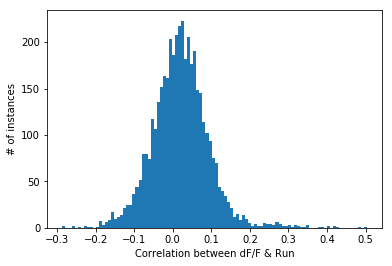

In [527]:
runcorr = superframe.pearson_run_corr.values
plt.hist(runcorr[~np.isnan(runcorr)],100);
plt.xlabel('Correlation between dF/F & Run')
plt.ylabel('# of instances')


In [448]:
np.unique(superframe['cre_line'].values)

array(['Slc17a7-IRES2-Cre', 'Vip-IRES-Cre'], dtype=object)

Text(0,0.5,'# of instances')

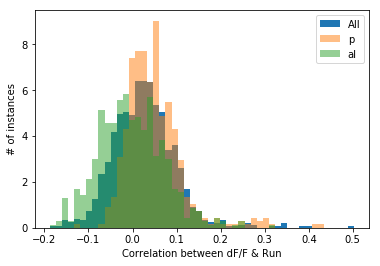

In [519]:
runcorr = superframe[(superframe['session_type']=='behavior_session_C')]['pearson_run_corr'].values

#runcorrA = superframe[(superframe['session_type']=='behavior_session_A')&(superframe['cre_line']=='Slc17a7-IRES2-Cre')]['pearson_run_corr'].values
#runcorrC = superframe[(superframe['session_type']=='behavior_session_C')&(superframe['cre_line']=='Slc17a7-IRES2-Cre')]['pearson_run_corr'].values

#runcorrA = superframe[(superframe['session_type']=='behavior_session_A')&(superframe['cre_line']=='Vip-IRES-Cre')]['pearson_run_corr'].values
#runcorrC = superframe[(superframe['session_type']=='behavior_session_C')&(superframe['cre_line']=='Vip-IRES-Cre')]['pearson_run_corr'].values

#runcorrA = superframe[(superframe['session_type']=='behavior_session_A')&(superframe['cre_line']=='Vip-IRES-Cre')]['pearson_run_corr'].values
#runcorrC = superframe[(superframe['session_type']=='behavior_session_A')&(superframe['cre_line']=='Slc17a7-IRES2-Cre')]['pearson_run_corr'].values

runcorrA = superframe[(superframe['session_type']=='behavior_session_D')&(superframe['targeted_structure']=='VISp')]['pearson_run_corr'].values
runcorrC = superframe[(superframe['session_type']=='behavior_session_D')&(superframe['targeted_structure']=='VISal')]['pearson_run_corr'].values
obj = plt.hist(runcorr[~np.isnan(runcorr)],bins = 50,alpha = 1,normed = True)
plt.hist(runcorrA[~np.isnan(runcorrA)],bins = obj[1],alpha = .5,normed = True)
plt.hist(runcorrC[~np.isnan(runcorrC)],bins = obj[1],alpha = .5,normed = True);
plt.legend(['All','p','al'])
plt.xlabel('Correlation between dF/F & Run')
plt.ylabel('# of instances')


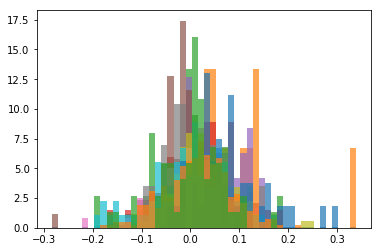

In [502]:
mousename = np.unique(superframe['donor_id'])
runcorr= superframe[(superframe['session_type']=='behavior_session_A')]['pearson_run_corr'].values
obj = plt.hist(runcorr[~np.isnan(runcorr)],bins = 50,alpha = .7,normed = True)

for ii, name in enumerate(mousename):
    runcorr = superframe[(superframe['session_type']=='behavior_session_A')&(superframe['donor_id']==name)]['pearson_run_corr'].values
    plt.hist(runcorr[~np.isnan(runcorr)],bins = obj[1],alpha = .7,normed = True);



In [520]:
# grab a pseudorandom experiment
    
subframe = manifest[(manifest.targeted_structure == 'VISp')&(manifest.cre_line == 'Slc17a7-IRES2-Cre')&(manifest.session_type =='behavior_session_A' )]
experiment_id = subframe['experiment_id'].values[0]

dataset= VisualBehaviorOphysDataset(experiment_id, cache_dir=obhf.drive_path)

(array([  3.00000000e+00,   6.00000000e+00,   1.30000000e+01,
          3.50000000e+01,   4.00000000e+01,   6.80000000e+01,
          1.52000000e+02,   3.53000000e+02,   6.18000000e+02,
          3.18400000e+03,   8.83100000e+03,   1.72500000e+03,
          1.08500000e+03,   8.26000000e+02,   6.37000000e+02,
          7.54000000e+02,   9.40000000e+02,   1.10600000e+03,
          1.31600000e+03,   1.33800000e+03,   1.53200000e+03,
          2.02900000e+03,   2.44800000e+03,   2.75500000e+03,
          2.53600000e+03,   2.71200000e+03,   3.55500000e+03,
          3.86100000e+03,   3.85300000e+03,   3.11200000e+03,
          3.29500000e+03,   4.11600000e+03,   4.68100000e+03,
          4.92900000e+03,   4.44300000e+03,   4.60800000e+03,
          5.99600000e+03,   6.41900000e+03,   5.91300000e+03,
          4.40100000e+03,   3.70600000e+03,   3.81900000e+03,
          2.23500000e+03,   1.02000000e+03,   3.58000000e+02,
          2.00000000e+02,   7.70000000e+01,   3.60000000e+01,
        

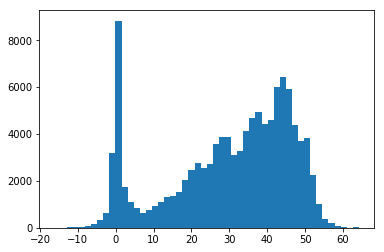

In [521]:
# Now lets load some data
dff = dataset.dff_traces
tme = dataset.timestamps_ophys
run = dataset.running_speed['running_speed'].values
dt = 1/dataset.metadata.ophys_frame_rate.values[0]
run = np.interp(tme,dataset.timestamps_stimulus,run)
#
#plt.plot(run)
plt.hist(run,bins = 50)

Text(0,0.5,'dF/F')

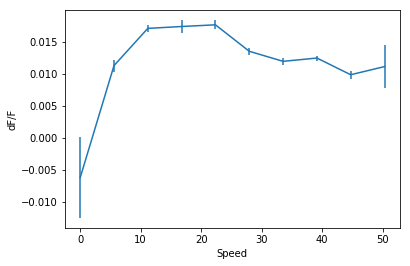

In [525]:
# Build a "tuning curve": See pillow paper
%matplotlib inline
from scipy.stats import binned_statistic
#for ii in range(dff.shape[0]):
#for ii in range(dff.shape[0]):
ii = 0
bins = np.linspace(0,np.percentile(run,95),11)
mn,bs,_ = binned_statistic(run,dff[ii,:],bins=bins)
st,_,_ = binned_statistic(run,dff[ii,:],statistic = sp.stats.sem ,bins=10)
plt.errorbar(np.linspace(np.min(bs),np.max(bs),len(bs)-1),mn,yerr=st)
plt.xlabel('Speed')
plt.ylabel('dF/F')

In [312]:
ii

777